# K Means Clustering - Probability Interesting Data

## Importing the required libraries

In [1]:
import os
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Importing the data

In [2]:
data = pd.read_csv ('auto-mpg.csv')
data.tail ()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [3]:
#checking for the null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Plot to visualize the data

In [4]:
def scatter (params, y):
    fig = plt.figure (figsize = (15, 14))
    num = 1
    for x in params:
        plt.subplot (3, 3, num)
        plt.scatter (data [x], data [y])
        plt.grid (True)
        plt.xlabel (x, fontweight = 'bold')
        plt.ylabel (y, fontweight = 'bold')
        plt.xticks ([], [])
        plt.yticks ([], [])
        num += 1
    plt.show ()

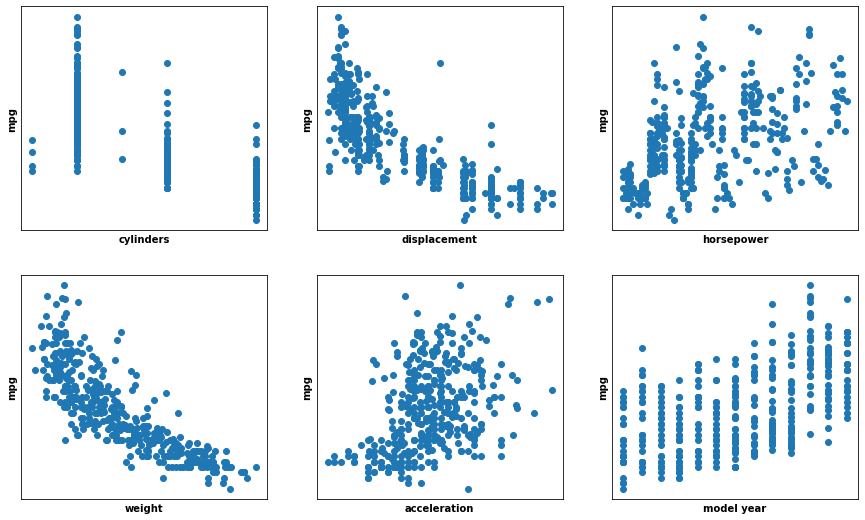

In [5]:
params = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
scatter (params, 'mpg')

##Observation:

From the above pair plots, we can clearly understand that there is a good amount of distribution of weight and acceleration with mpg respectively. We can use this distributions further and apply k means algorithm.

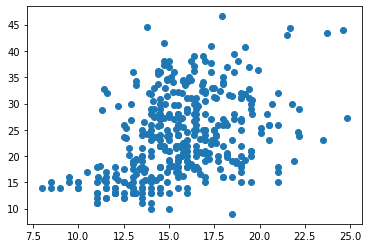

In [6]:
#We will concentrate more on weight, acceleration and mpg for k-means
mpg = data ['mpg'].values
weight = data ['weight'].values
acceleration = data ['acceleration'].values
plt.scatter (acceleration, mpg)
plt.show ()

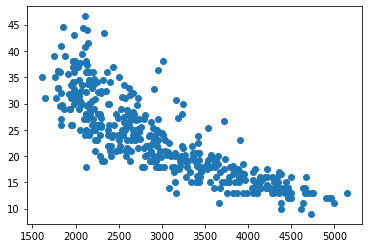

In [7]:
plt.scatter (weight, mpg)
plt.show ()

## K means algorithm:

In [8]:
def kmeans(data, xlabel, ylabel, k):
    #Getting data without path specification
    data_name = os.path.splitext(os.path.basename(data))[0]
    if not os.path.exists(data_name):
        os.makedirs(data_name)

    print("---K-means clustering---")
	
    #Style and dimensions of the plot
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.style.use('ggplot')

    #Importing the data
    data = pd.read_csv(data)
    print("data and shape:")
    print(data.shape)
    data.head()

    #Using x and y values to plot the distribution
    x1 = data[xlabel].values
    y1 = data[ylabel].values
    X = np.array(list(zip(x1, y1)))
    plt.scatter(x1, y1, c='black', s=5)

    #Choose random values for starting centroids
    Centroid_x = np.random.randint(np.min([i[0] for i in X]), np.max([i[0] for i in X]), size=k)
    Centroid_y = np.random.randint(np.min([i[1] for i in X]), np.max([i[1] for i in X]), size=k)
    C = np.array(list(zip(Centroid_x, Centroid_y)), dtype=np.float32)
    print("Starting Centroid points:")
    print(C)

    #Including centroids in the plot
    plt.scatter(Centroid_x, Centroid_y, marker='o', s=100, c='black')

    #Initial plot
    plt.title("Initial: {}".format(data_name))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

    #Store the old value since the centroid updates further
    Centroid_old = np.zeros(C.shape)
    #Clustering 
    clusters = np.zeros(len(X))

    #Continue the loop till distance is zero between new and old centroids
    err = dist(C, Centroid_old, None)
    while err != 0:
        #Compare each value and assign it to closest cluster
        for i in range(len(X)):
            cluster_distances = dist(X[i], C)
            cluster = np.argmin(cluster_distances)
            clusters[i] = cluster
        #keeping a copy of the old centroid values
        Centroid_old = deepcopy(C)
        #Finding new centroids nothing but the average values
        for i in range(k):
            centroid_points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(centroid_points, axis=0)
        err = dist(C, Centroid_old, None)

    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    fig, ax = plt.subplots()
    for i in range(k):
            centroid_points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(centroid_points[:, 0], centroid_points[:, 1], s=5, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

    # Save clustering plot
    plt.title("Clustering: {}".format(data_name))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

# Euclidean distance calculator
def dist(m, n, ax=1):
    return np.linalg.norm(m - n, axis=ax)

---K-means clustering---
data and shape:
(398, 9)
Starting Centroid points:
[[11. 41.]
 [18. 36.]]


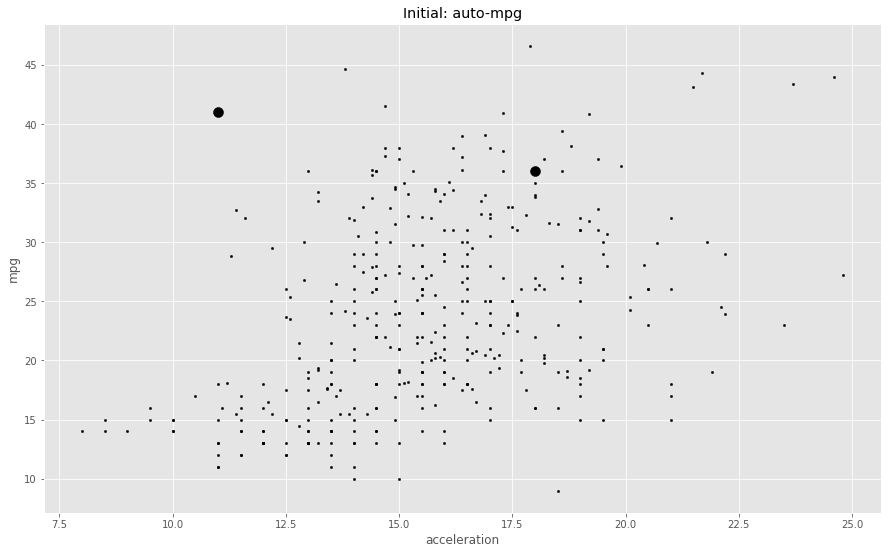

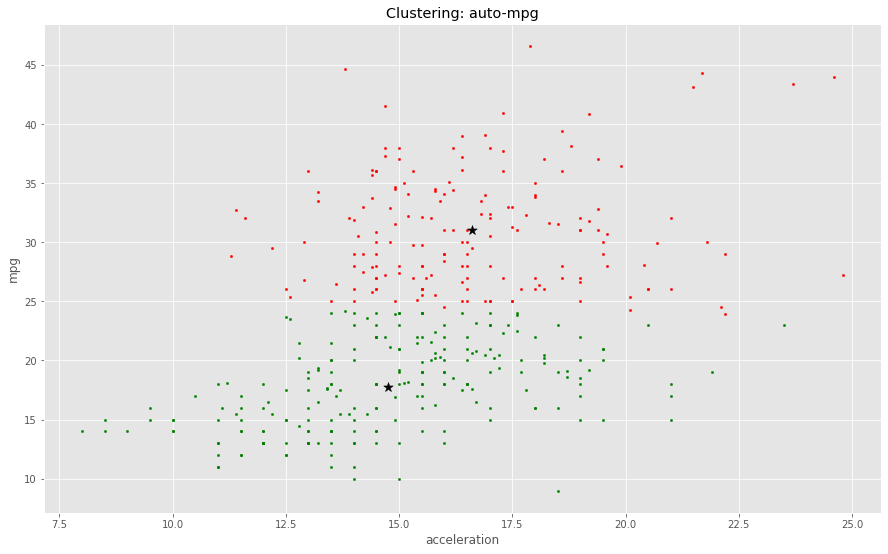

In [9]:
data = "auto-mpg.csv"
xs = "acceleration"
ys = "mpg"
k = 2
kmeans(data, xs, ys, k)

---K-means clustering---
data and shape:
(398, 9)
Starting Centroid points:
[[2056.   37.]
 [4486.   29.]]


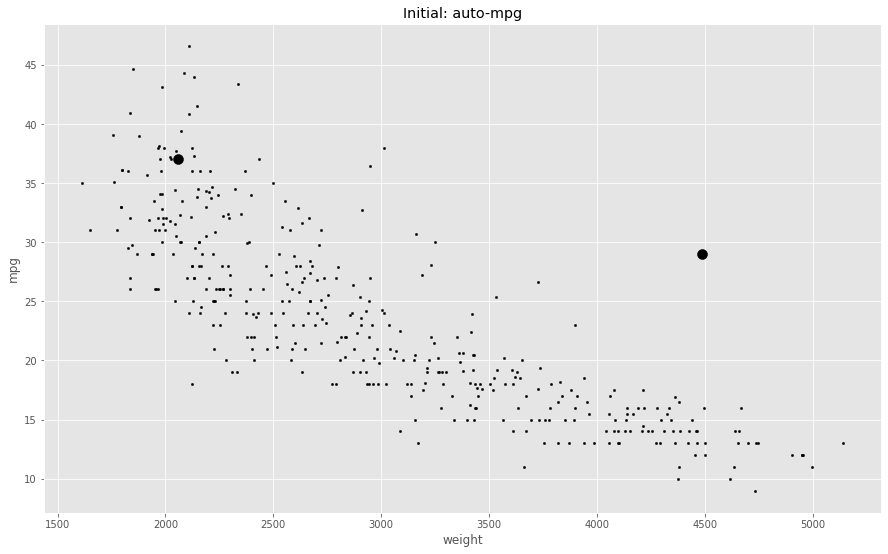

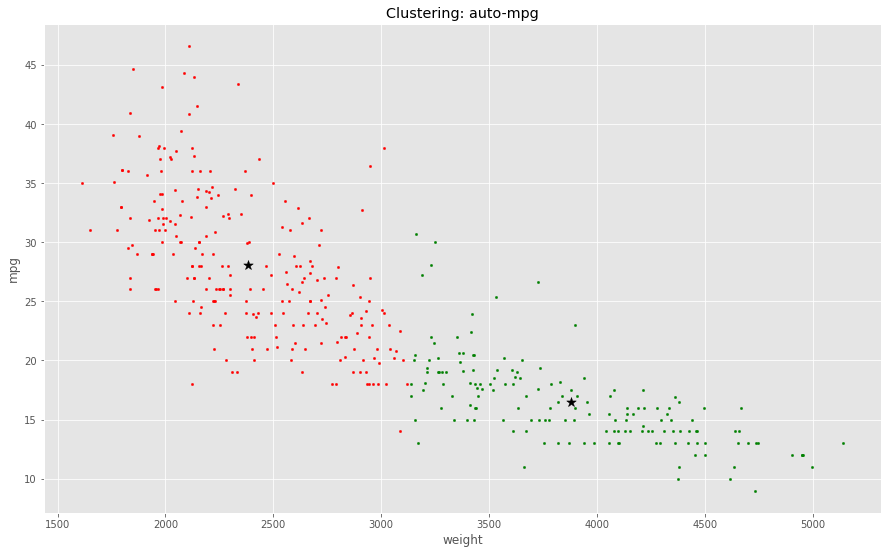

In [11]:
data = "auto-mpg.csv"
xs = "weight"
ys = "mpg"
k = 2
kmeans(data, xs, ys, k)

## Conclusion:

From the above plots, we can say that k means clustering performed pretty well. Mpg versus acceleration and mpg versus weight plots are shown above in which the clusters are differentiated and can be clearly seen.